In [5]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')

if len(gpus) > 0:
    print("GPU!!")
    tf.config.experimental.set_visible_devices(devices=gpus[0], device_type='GPU')
    tf.config.experimental.set_memory_growth(device=gpus[0], enable=True)

from tensorflow import keras
from tensorflow.keras import layers, backend, losses, Sequential
from tensorflow.keras.utils import Sequence

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

import random
import numpy as np

    
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams["figure.dpi"] = 100.0

In [6]:
def show_random_digits(X):

    scale = np.abs(X).max()

    # Mostrar varios ejemplos.
    fig, axs = plt.subplots(6, 9, sharex=True)

    for ax in axs.flatten():
        x = random.choice(X)
        ax.imshow(x.reshape(28,28), interpolation='nearest', cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
        

In [7]:
# Primero cargamos el dataset de MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [8]:
def build_model(hidden=True):
    
    m = Sequential()
    
    m.add(keras.Input(shape=(28 * 28, )))
    
    if hidden:
        # Capa escondida
        m.add(tf.keras.layers.Dense(128, activation='relu'))
    
    # Afterwards, we do automatic shape inference:
    m.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    m.compile(optimizer='sgd', loss='mse')
    
    print(m.summary())
    
    return m

In [9]:
# Solo queremos detectar si una imagen representa un tres o no.
y_ = np.piecewise(y, [y=='6'], [1, 0]).astype('int')

# Partir el set de datos en entrenamiento y pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y_, train_size=10000, test_size=1000)

# Seed para el generador de numeros aleatorios.
random_state = check_random_state(2020)

# Permutar el dataset.
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

# Flatten.
X = X.reshape((X.shape[0], -1))

# Normalize.
scaler = StandardScaler()
X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.transform(X_test)

# Modelo
m = build_model(hidden=True)

# Entrenar.
m.fit(X_train_nor, y_train, epochs=10, validation_data=(X_test_nor, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________
None
Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0646 - val_loss: 0.0342
Epoch 2/10
 3008/10000 [========>.....................] - ETA: 0s - loss: 0.0284

/home/jcardona/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2342: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 1s 53us/sample - loss: 0.0252 - val_loss: 0.0252
Epoch 3/10
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0190 - val_loss: 0.0212
Epoch 4/10
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0158 - val_loss: 0.0189
Epoch 5/10
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0138 - val_loss: 0.0175
Epoch 6/10
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0124 - val_loss: 0.0165
Epoch 7/10
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0114 - val_loss: 0.0157
Epoch 8/10
10000/10000 [==============================] - 1s 58us/sample - loss: 0.0106 - val_loss: 0.0151
Epoch 9/10
10000/10000 [==============================] - 1s 55us/sample - loss: 0.0099 - val_loss: 0.0146
Epoch 10/10
10000/10000 [==============================] - 1s 55us/sample - loss: 0.0093 - val_loss: 0.0141


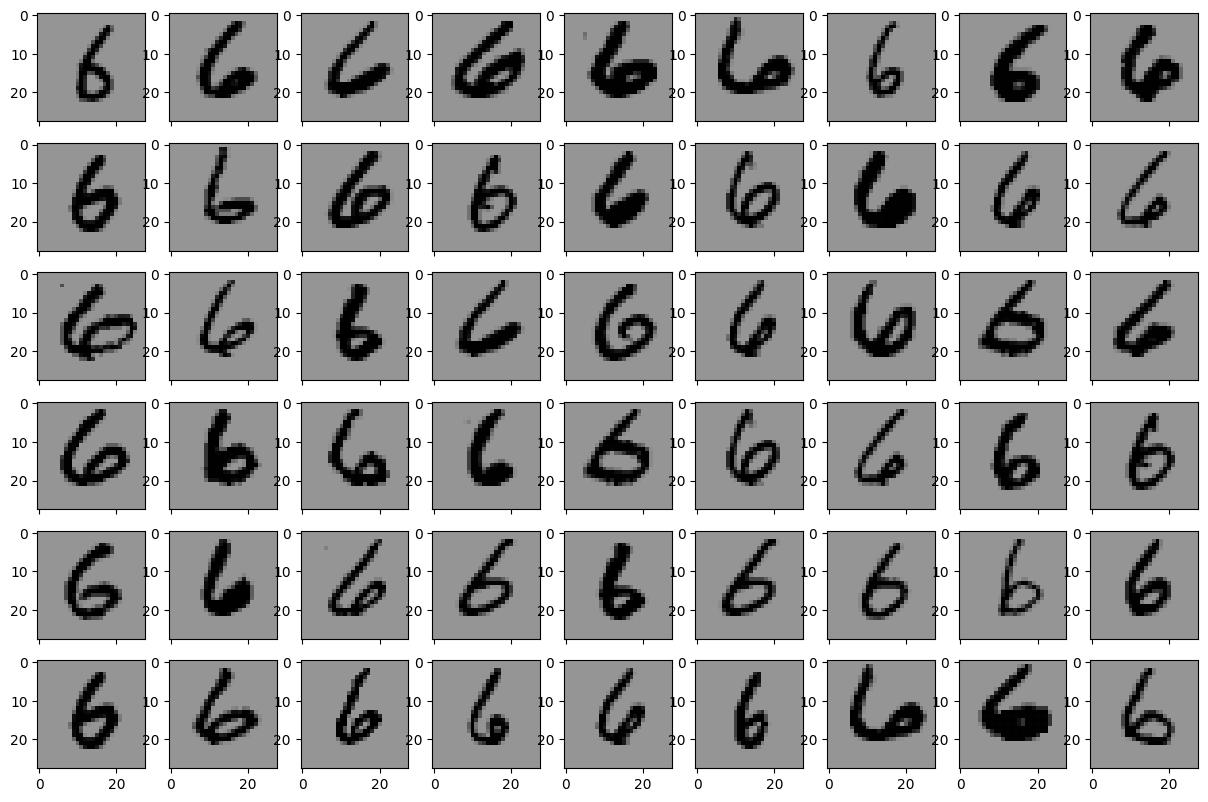

In [10]:
# Mostrar algunos digitos.
show_random_digits(X_test[m.predict(X_test_nor).flatten() > 0.9])